# Support Vector Regression (SVR) Model


    This notebook demonstrates the setup, training, and evaluation of a Support Vector Regression (SVR) model using the `PJM_Load_hourly.csv` dataset.
    We aim to forecast hourly energy loads using SVR from Scikit-learn.
    
    Import Libraries
    Necessary libraries for data handling, preprocessing, and model training are imported.
    

In [17]:

import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


## Load and Prepare Data

In [18]:

# Load the dataset
data_path = 'dataset.csv'
data = pd.read_csv(data_path)

# Strip any leading/trailing spaces from column names and rename the first column to 'Datetime'
data.columns = data.columns.str.strip()
data = data.rename(columns={data.columns[0]: 'Datetime'})

# Display basic information and the first few rows
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32896 entries, 0 to 32895
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Datetime     32896 non-null  object 
 1   PJM_Load_MW  32896 non-null  float64
dtypes: float64(1), object(1)
memory usage: 514.1+ KB
None
              Datetime  PJM_Load_MW
0  1998-12-31 01:00:00      29309.0
1  1998-12-31 02:00:00      28236.0
2  1998-12-31 03:00:00      27692.0
3  1998-12-31 04:00:00      27596.0
4  1998-12-31 05:00:00      27888.0


In [19]:
# Convert 'Datetime' to datetime object and set it as the index
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.set_index('Datetime', inplace=True)


# Check the first few rows of the resampled data
print(data.head())

                     PJM_Load_MW
Datetime                        
1998-12-31 01:00:00      29309.0
1998-12-31 02:00:00      28236.0
1998-12-31 03:00:00      27692.0
1998-12-31 04:00:00      27596.0
1998-12-31 05:00:00      27888.0


## Data Preprocessing

In [20]:

X = np.arange(len(data)).reshape(-1, 1)

y = data['PJM_Load_MW'].values  # Target: energy consumption

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1))


## Model Setup and Training

In [21]:

# Configure and train the SVR model with RBF kernel
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled.ravel())


SVR()

## Model Evaluation

Mean Squared Error: 0.9996579512892161


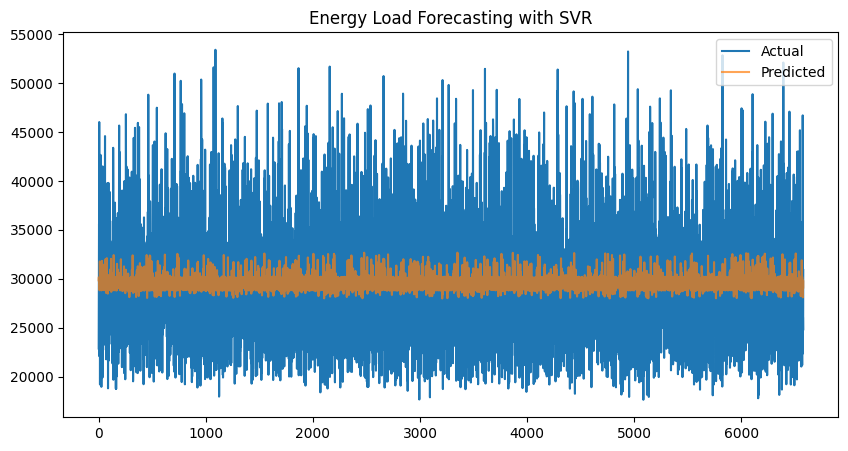

In [22]:

# Predict and evaluate the model
predictions = svr_model.predict(X_test_scaled)
mse = mean_squared_error(y_test_scaled, predictions)
print(f'Mean Squared Error: {mse}')

# Plotting the predictions against actual data
plt.figure(figsize=(10, 5))
plt.plot(scaler_y.inverse_transform(y_test_scaled), label='Actual')
plt.plot(scaler_y.inverse_transform(predictions.reshape(-1, 1)), label='Predicted', alpha=0.7)
plt.legend()
plt.title('Energy Load Forecasting with SVR')
plt.show()


In [23]:
from joblib import dump

# Save the SVR model
dump(svr_model, 'svr_model.joblib')




['svr_model.joblib']

In [24]:
# Evaluation Metrics

from sklearn.metrics import mean_absolute_error, r2_score

# Mean Absolute Error
mae = mean_absolute_error(y_test_scaled, predictions)

# R2 Score
r2 = r2_score(y_test_scaled, predictions)

print(f'Mean Absolute Error: {mae}')

print(f'R2 Score: {r2}')



Mean Absolute Error: 0.7769918875644641
R2 Score: 0.013076590772228114
